# Import Necssaries Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set_context('notebook')

import warnings
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay


# Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from tpot import TPOTClassifier

# EDA and preprocessing

In [5]:
pd.set_option('display.max_column', None)

In [6]:
df = pd.read_csv(r"C:\Users\Mo\Credit Card fraud Detection\creditcard.csv")
df.sample(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226797,144804.0,-2.196436,2.383264,2.614318,4.753895,-1.644649,2.374572,-2.329443,-0.849942,-0.387921,1.092051,-2.137548,0.738626,1.126342,-0.865495,-1.284697,-0.243603,1.182885,0.420169,1.444018,-0.167508,2.415343,0.030447,0.073367,0.068846,0.355556,0.697272,0.402377,0.136385,0.00,0
108625,70997.0,-2.296932,1.329430,0.920137,-1.371986,-0.647372,-0.992633,-0.192378,0.629623,0.644018,0.668787,0.887432,-0.146448,-1.857286,0.532174,0.215799,0.861396,-0.605968,0.343827,-0.281654,0.219730,-0.170613,-0.407754,-0.254336,0.336247,-0.121262,0.777085,0.503549,0.186885,0.77,0
40249,40154.0,-1.921965,-0.065706,1.880296,1.154859,0.648350,-0.535990,1.136515,-0.483497,-0.085531,0.716298,0.271126,-0.254701,-0.124939,-0.272073,1.607045,-0.714960,-0.043786,-0.429049,-0.006900,-0.002451,-0.157404,0.653862,0.395421,0.406523,0.654649,-0.137553,0.205851,-0.297832,90.99,0
531,394.0,-0.553092,1.667591,-0.047357,0.514249,0.589388,-0.635411,1.126611,-0.311882,0.035247,1.704936,1.112336,0.616777,0.217651,0.093269,0.051643,-0.471140,-0.700958,0.351666,0.709549,0.577734,-0.033537,0.687658,-0.076693,0.014810,-0.590713,-0.482998,0.137717,-0.334915,1.55,0
164296,116616.0,-1.544336,1.043398,1.062561,-0.782280,0.718816,-1.114662,1.097402,-0.259393,-0.153713,-0.183289,-0.768047,0.150961,0.263964,-0.090203,-0.204585,-0.184023,-0.354707,-0.802985,0.114580,-0.010469,-0.399230,-0.821628,-0.102364,0.057506,0.661956,0.329257,0.123477,0.137693,0.89,0
193078,129984.0,-3.427311,-0.112297,-2.246952,0.270426,1.984532,-1.333737,1.969279,-1.606804,1.121277,2.255484,-0.032385,-0.710169,0.095705,-1.811037,1.048307,-0.581847,0.332604,-0.186885,0.963325,-1.413038,-0.437528,0.894695,0.376049,0.624988,-0.958068,0.275265,-2.748361,0.094056,15.65,0
60167,49189.0,-1.800162,-0.574356,1.567507,0.212494,2.078050,-1.122300,-0.147951,0.238795,-0.348169,-0.640528,-1.109126,-0.817470,-1.329149,0.563737,0.828569,0.086555,-0.455016,-0.127522,-0.997664,0.167346,0.180013,-0.015228,-0.145701,-0.503973,0.717305,-0.345169,-0.017175,0.080280,4.95,0
39960,40036.0,1.028591,-0.075232,0.438512,1.374269,-0.368287,-0.001437,-0.078924,0.192824,0.242219,0.069812,1.087190,0.481948,-1.760503,0.585619,-0.638807,-0.510363,0.175312,-0.355903,-0.157937,-0.201661,-0.029675,-0.050611,-0.067041,0.192772,0.539487,-0.341499,0.018921,0.011541,48.56,0
204903,135496.0,1.487739,-1.187100,-0.389319,1.101995,-0.539192,1.073049,-0.800342,0.308928,1.087045,0.223758,-0.426922,0.565638,0.502126,-0.131090,0.599019,1.429533,-1.662482,1.572569,-0.290451,0.319121,0.386936,0.698536,-0.187317,-1.455136,-0.278620,-0.556468,0.043624,0.002249,251.54,0
221641,142642.0,0.621165,-0.236841,-0.007312,-1.815303,0.589393,0.997597,-0.223260,0.229401,-0.351261,-0.260220,0.157793,-0.608438,0.329012,-2.013707,0.673796,0.739098,1.611249,-2.302868,-0.987605,0.017549,0.024407,0.312222,0.390005,-0.485633,-1.424661,-0.614308,-0.011520,-0.172904,17.00,0


In [7]:
print(f"data has {df.shape[0]} rows & {df.shape[1]} columns ")

data has 284807 rows & 31 columns 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


- 75% or more of the classes column are = 0
- only 25% or lees of the classes column are = 1 which is something tricky 

<Axes: xlabel='Class', ylabel='count'>

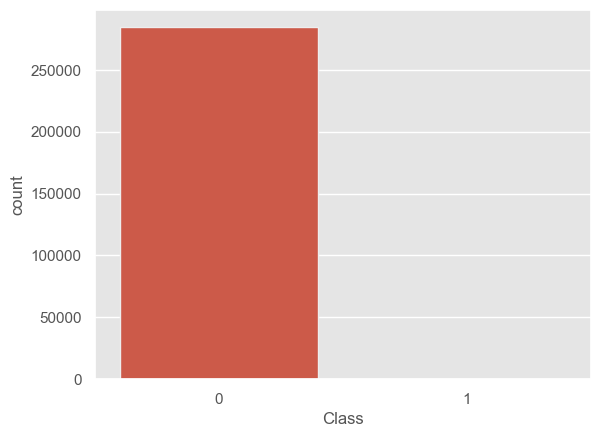

In [11]:
sns.countplot(data=df, x="Class")

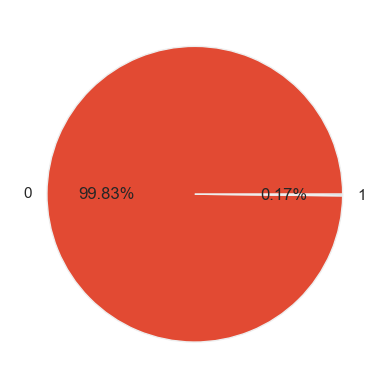

No Frauds 99.83 % of the dataset
# 284315 sample
Frauds 0.17 % of the dataset
# 492 sample


In [12]:
plt.pie(x=df.Class.value_counts(), labels = df.Class.unique() , autopct='%.02f%%')
plt.show()
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset\n#',round(df['Class'].value_counts()[0]),'sample')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset\n#',round(df['Class'].value_counts()[1]),'sample')

Data is Highly Unbalanced

In [14]:
df_duplicated = df[df.duplicated(keep='last')==True]

df_duplicated.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [15]:
print(len(df_duplicated[df_duplicated['Class']==1]))

19


In [16]:
print(f"numper of nall values : {df.isna().any().sum()}")

numper of nall values : 0


***Note:*** Notice howe imbalanced is our original dataset! Most of the transaction  are non_fraud. if we use this dataset as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

- Build a sample dataset containing similar distribution of normal transactions

- getting a non_fraud sample that equals to the fraud one to make the data balanced

<Axes: >

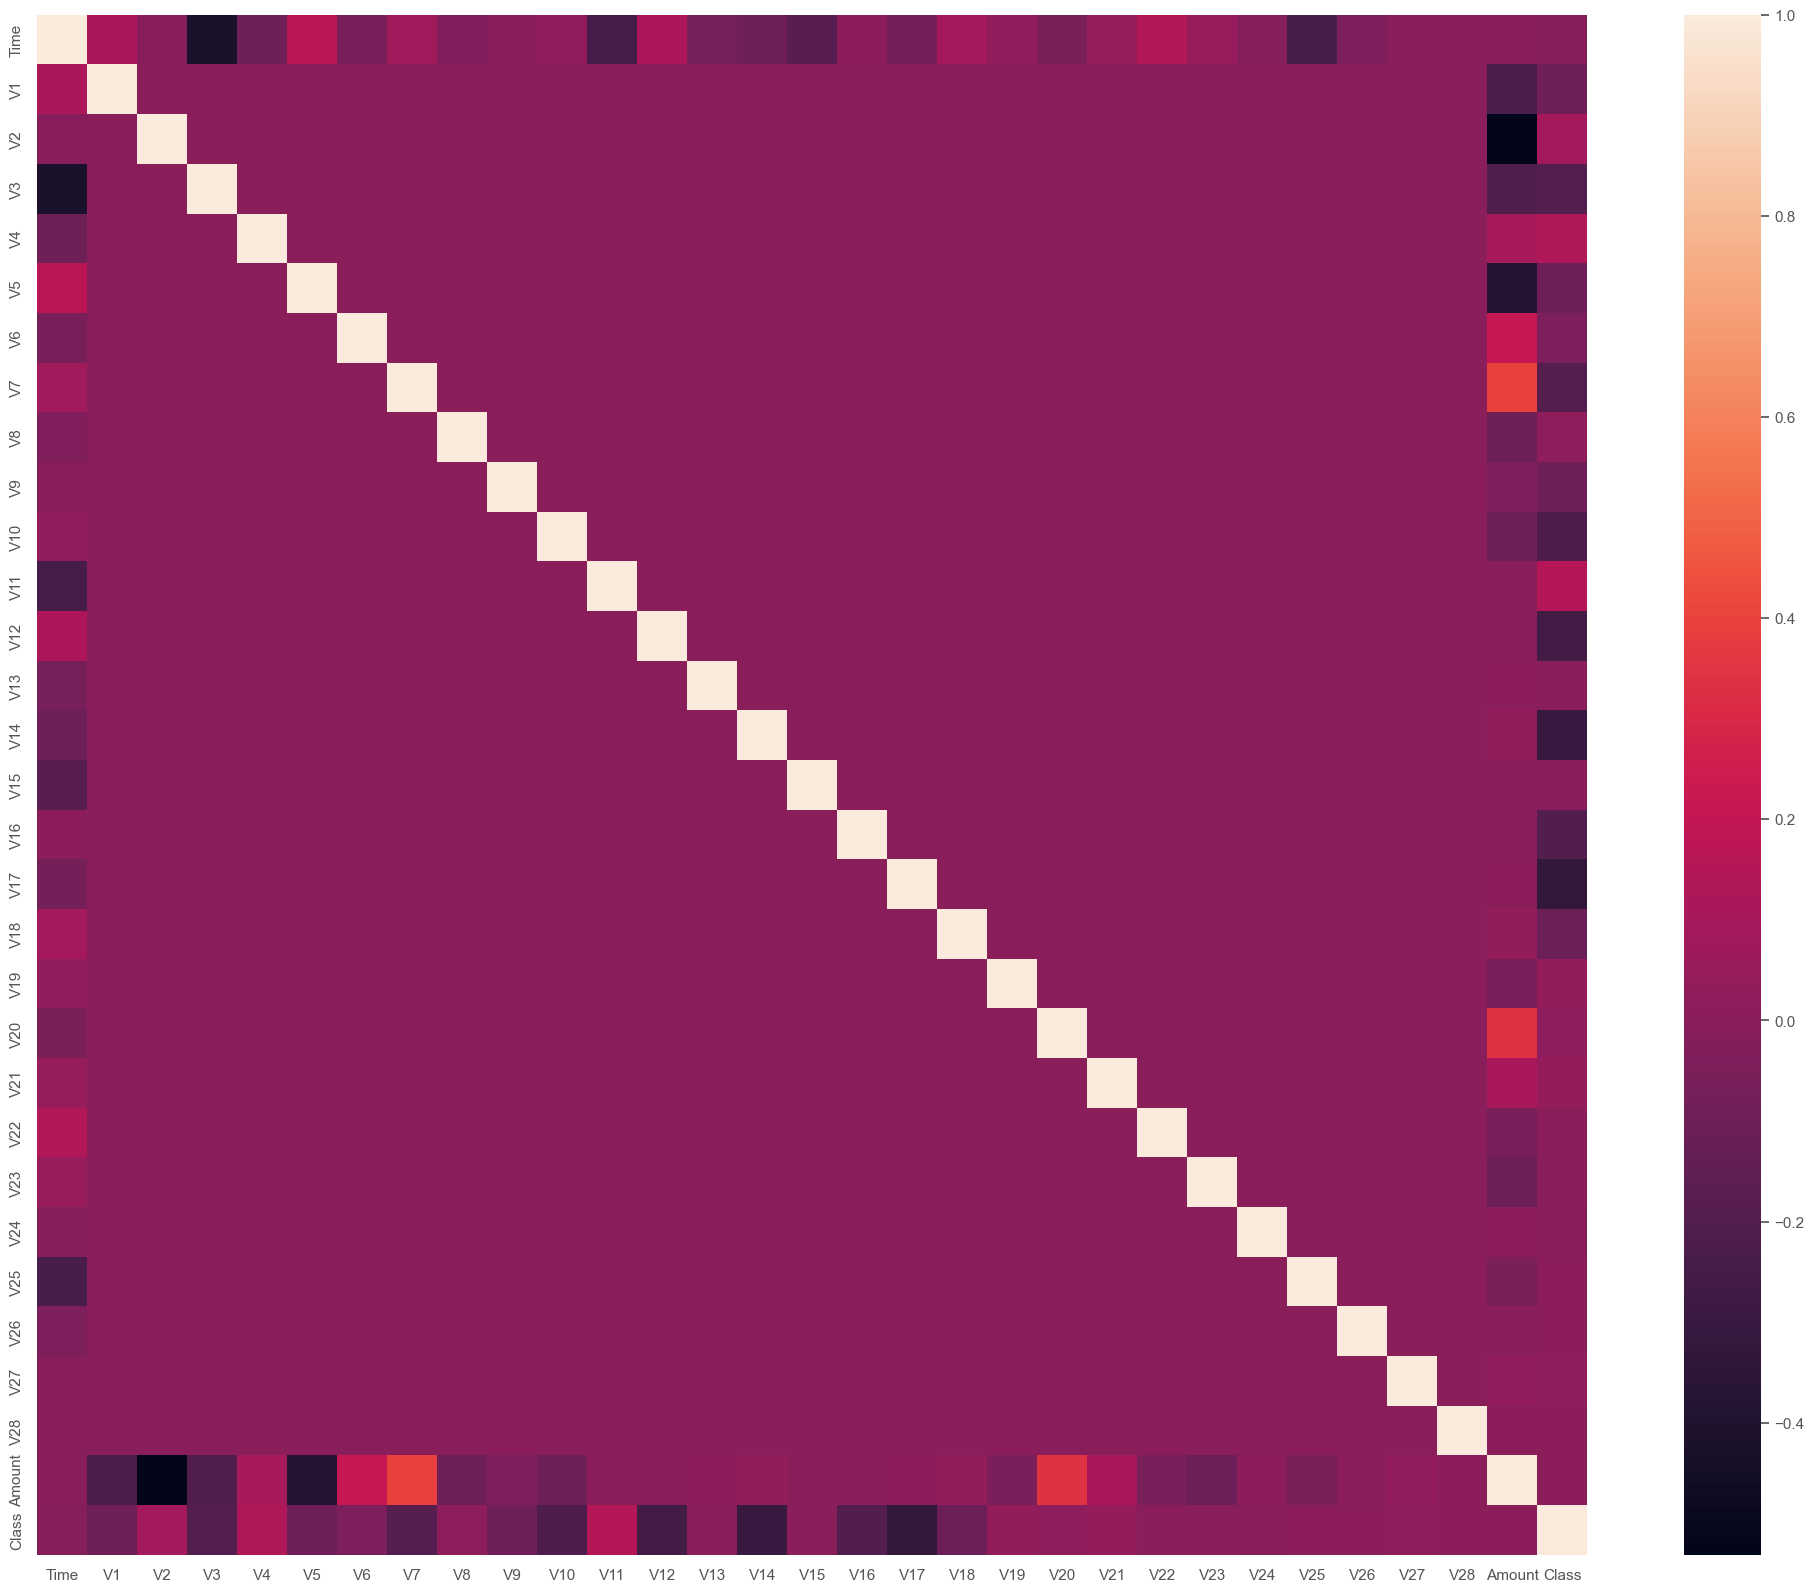

In [18]:
plt.figure(figsize=(25,20))

sns.heatmap(df.corr(), annot_kws={'size':20})


In [19]:
safe = df[df.Class==0]
fraud = df[df.Class==1]

In [20]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
df.groupby('Class').median()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.00
1,75568.5,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.25


In [22]:
df.groupby('Class').max()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,172792.0,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16
1,170348.0,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87


In [23]:
safe_sample = safe.sample(len(fraud))

In [24]:
len(safe_sample)

492

In [25]:
balanced_data =pd .concat([fraud, safe_sample], axis=0)
balanced_data.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79281,57950.0,-0.308587,-3.060247,0.056859,1.302338,-2.118552,0.013422,0.228813,-0.040542,-0.718477,0.593379,0.717495,-0.045230,-1.337967,0.511595,-0.227014,-1.133671,-0.104385,2.013162,-1.101031,0.983894,0.152322,-0.885594,-0.650011,0.502320,0.039135,-0.446159,-0.094856,0.162401,809.64,0
251891,155548.0,1.878230,1.325630,-2.333469,4.233151,1.355184,-0.853508,0.716025,-0.164910,-1.502345,0.259411,1.451238,-0.280523,-0.756794,-2.757557,-1.706285,1.587460,1.929350,1.189433,-1.530162,-0.226108,-0.152131,-0.360736,0.043414,-0.242380,0.171098,-0.002601,-0.026667,0.005238,7.06,1
63679,50827.0,1.421835,-0.957380,0.849790,-1.314482,-1.584449,-0.606222,-1.049468,-0.135076,-1.961738,1.328149,0.306259,0.036837,1.743727,-0.587308,0.841454,-0.636164,0.749443,-0.796710,-0.732287,-0.267948,-0.300135,-0.433722,0.226644,0.377561,0.055532,-0.405465,0.066974,0.033802,21.00,0
43160,41397.0,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,-14.226698,5.610999,-11.793979,1.598387,-11.606970,-0.044180,-9.286955,-19.899726,-7.518051,1.243517,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,273.01,1
211262,138337.0,0.052172,0.901088,0.277550,-0.604893,0.473220,-1.079154,1.040535,-0.228180,-0.105296,-0.423220,-0.908359,0.345924,0.450822,0.022819,-0.446155,-0.095523,-0.455556,-0.781469,-0.063504,-0.011337,-0.260256,-0.547230,0.054881,-0.019305,-0.466881,0.140683,0.250231,0.097607,2.58,0
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1
96818,65949.0,-0.507709,-0.105561,-0.531914,-3.590189,1.246006,3.127968,-1.070118,1.289384,-2.514050,0.848118,-0.664033,-1.151088,0.385834,-0.020318,0.006203,0.193411,-0.104575,0.526767,-0.486875,-0.248735,-0.162930,-0.270129,-0.050582,0.963920,-0.121062,-0.392890,0.271826,0.141256,1.00,0
151103,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,0.912806,0.765354,-2.043868,1.001547,1.322887,-2.720077,-0.153430,0.752611,-0.755786,-1.912563,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76,1
262013,160271.0,-0.608483,-0.412636,0.554424,-3.017239,-0.707009,-0.063856,-0.477624,0.427634,-2.106486,0.263976,-1.797653,-1.073720,0.653082,-0.419633,-0.738197,-0.040170,0.181631,0.239108,-0.762314,-0.350782,-0.022075,0.092966,-0.005496,0.240532,-0.119612,-0.289220,0.004460,0.071413,59.00,0
21710,31817.0,1.138431,0.033918,0.767485,1.266576,-0.697509,-0.394200,-0.232021,0.133185,0.437304,0.046723,0.909241,0.467611,-1.700934,0.456446,-0.722687,-0.083014,-0.156765,0.067464,0.272218,-0.247665,-0.207979,-0.526511,0.058994,0.475187,0.412846,-0.550815,0.025344,0.015669,6.63,0


<Axes: xlabel='Class', ylabel='count'>

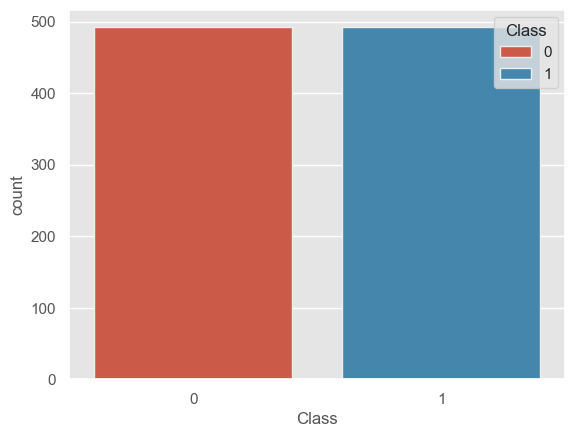

In [26]:
sns.countplot(data=balanced_data, x="Class",hue='Class')

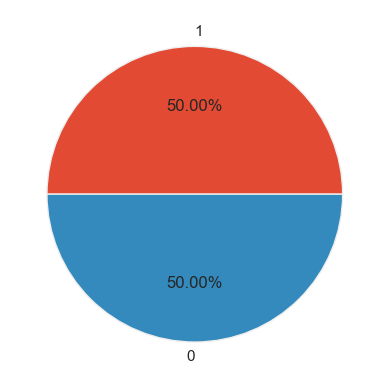

No Frauds 50.0 % of the dataset
# 492 sample
Frauds 50.0 % of the dataset
# 492 sample


In [27]:
plt.pie(x=balanced_data.Class.value_counts(), labels = balanced_data.Class.unique() , autopct='%.02f%%')
plt.show()
print('No Frauds', round(balanced_data['Class'].value_counts()[0]/len(balanced_data) * 100,2), '% of the dataset\n#',round(balanced_data['Class'].value_counts()[0]),'sample')
print('Frauds', round(balanced_data['Class'].value_counts()[1]/len(balanced_data) * 100,2), '% of the dataset\n#',round(balanced_data['Class'].value_counts()[1]),'sample')


now we have equal number ofsafel and fraud that's how we convert our data from un-balanced to balanced data

In [29]:
balanced_data.groupby('Class')[['Amount','Time']].mean()

,Amount,Time
Class,,
0,70.871016,93795.571138
1,122.211321,80746.806911


<Axes: >

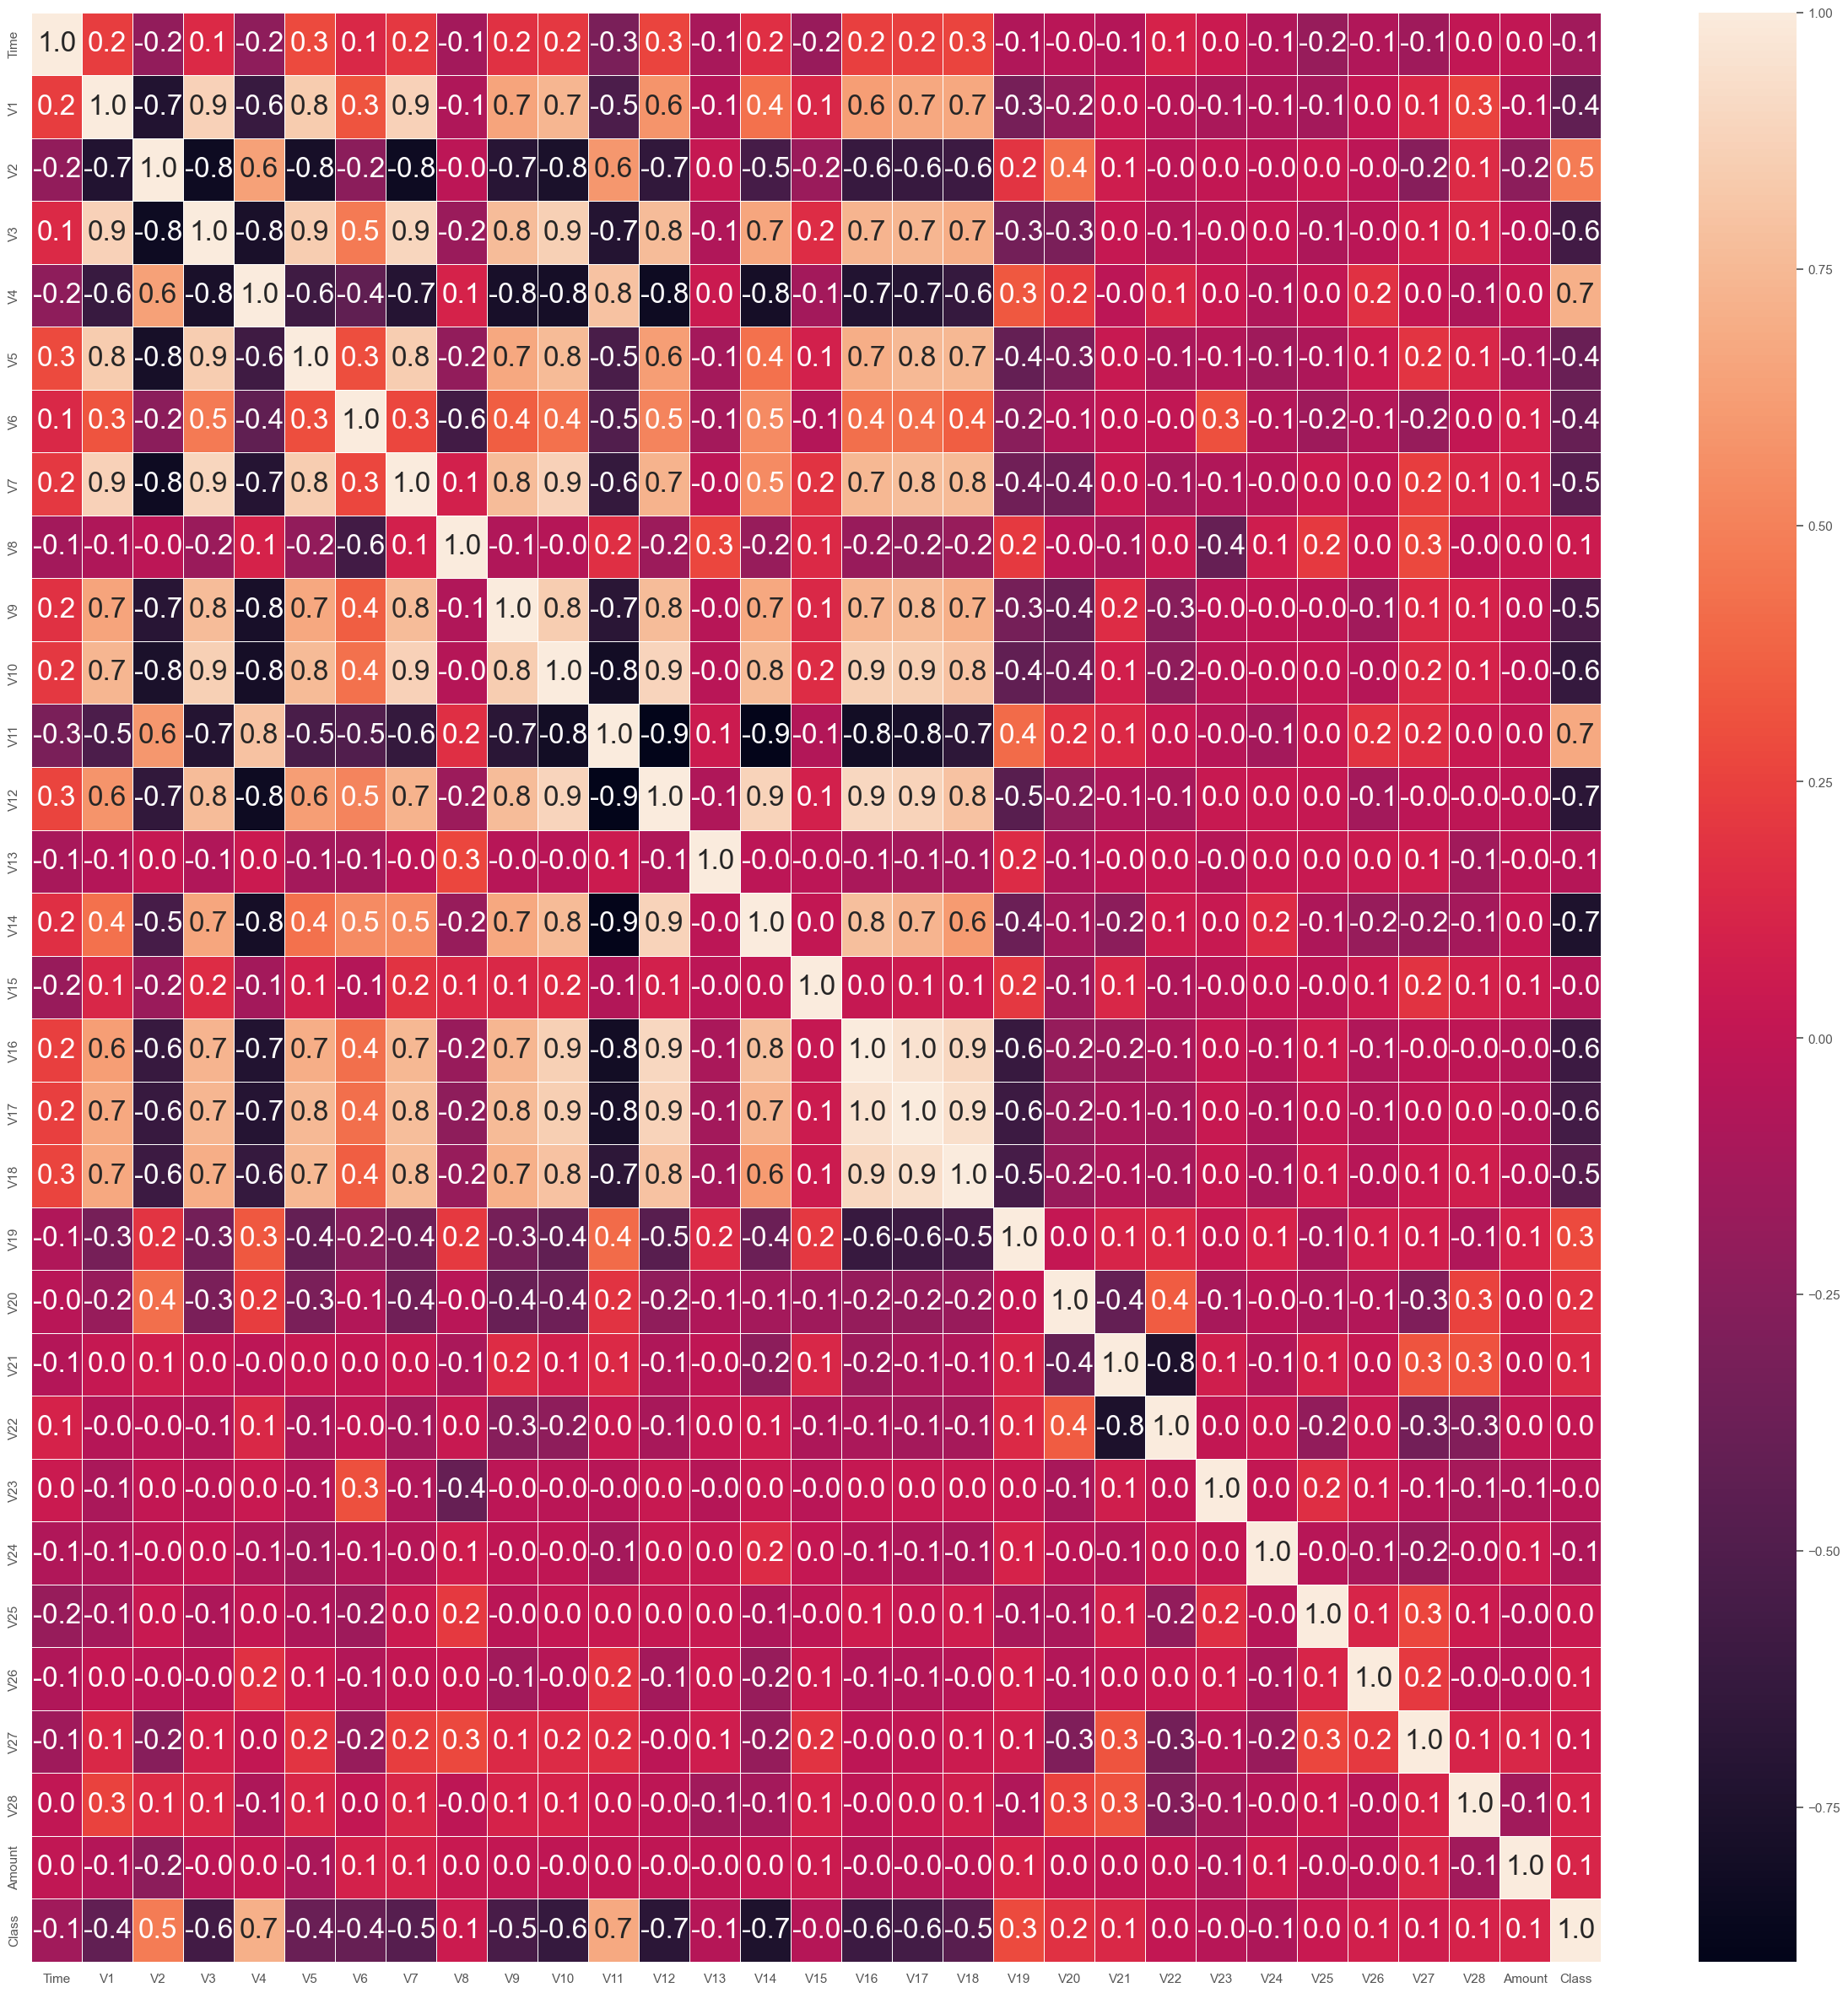

In [30]:
plt.figure(figsize=(30,30))

sns.heatmap(balanced_data.corr(), annot = True, fmt=".1f", linewidth=.5, annot_kws={'size':24})

In [31]:
balanced_data.corr()[['Class','Amount']]

,Class,Amount
Time,-0.136668,0.005044
V1,-0.420154,-0.059696
V2,0.476458,-0.232097
V3,-0.573250,-0.018772
V4,0.706298,0.023817
V5,-0.381842,-0.104975
V6,-0.395883,0.096564
V7,-0.476065,0.105235
V8,0.056042,0.035488
V9,-0.541516,0.007279


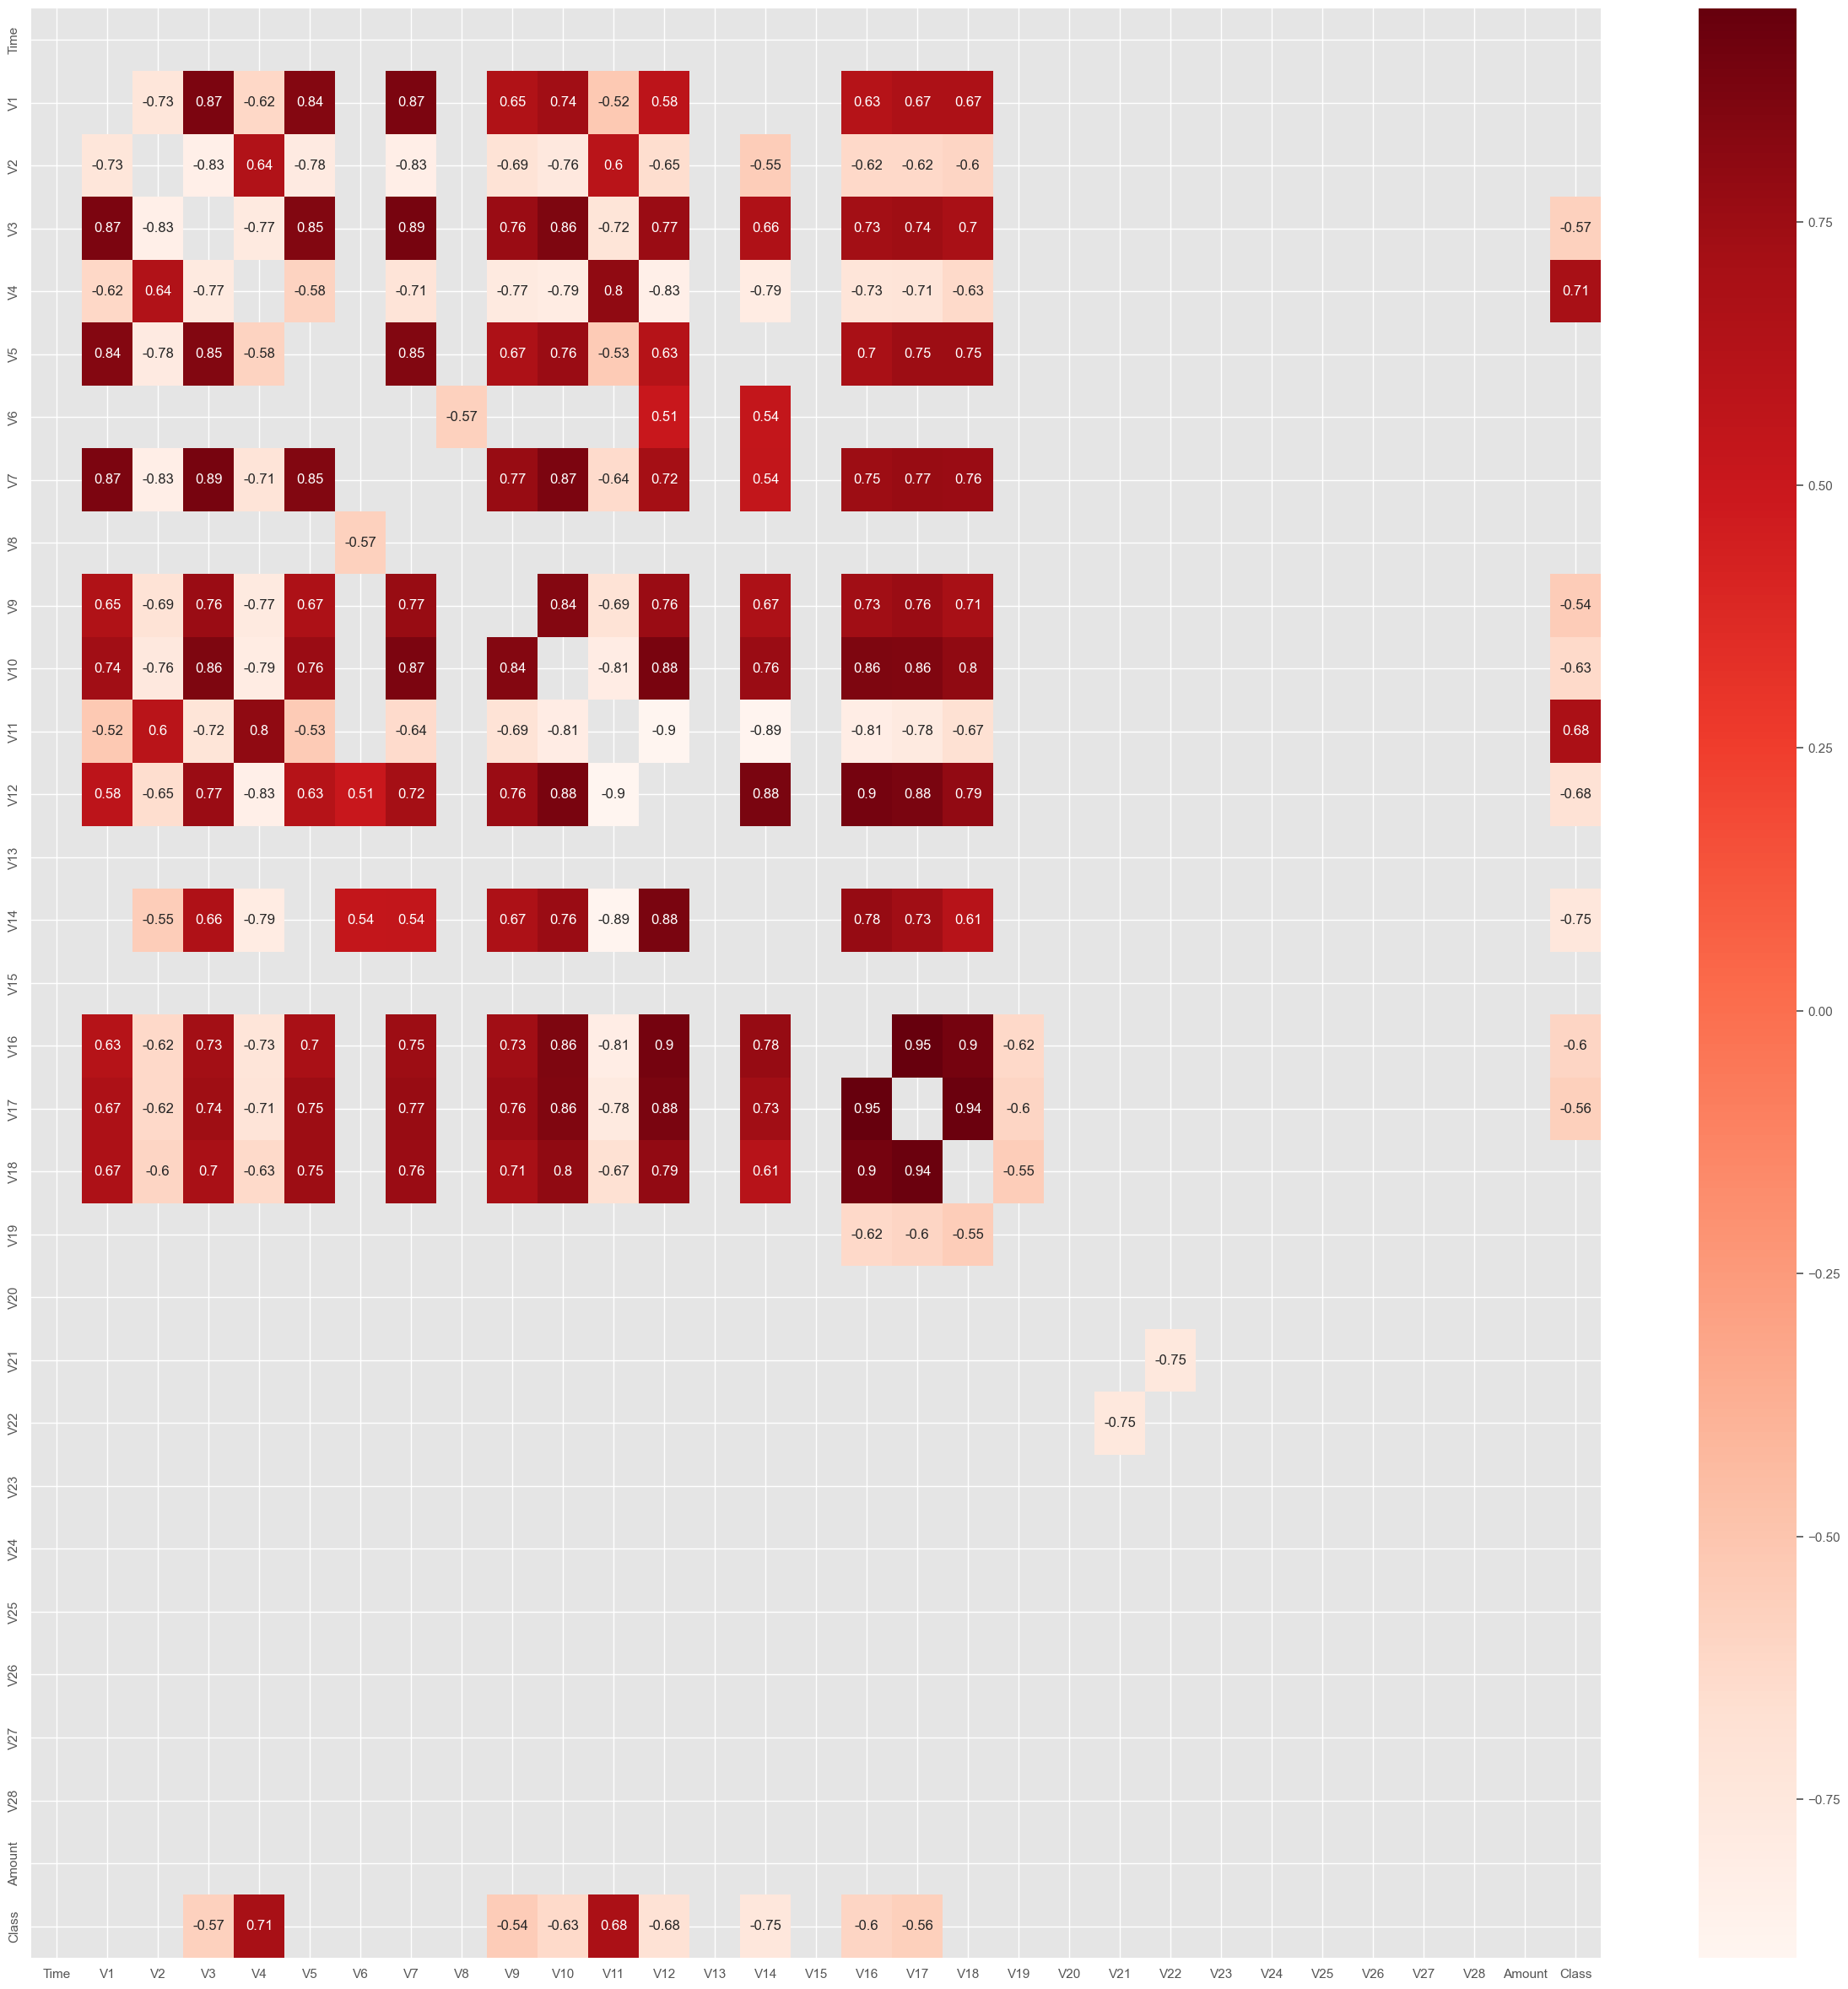

In [32]:

dfCorr = balanced_data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

***NOTE:*** 

look at the diffrence correlation between imbalanced df and balanced df
Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

V3, V9, V10, V12 are negative correlated to Class let's visualize those features V2, V4, V11, V19  are Positive correlated to Class let's visualize those features

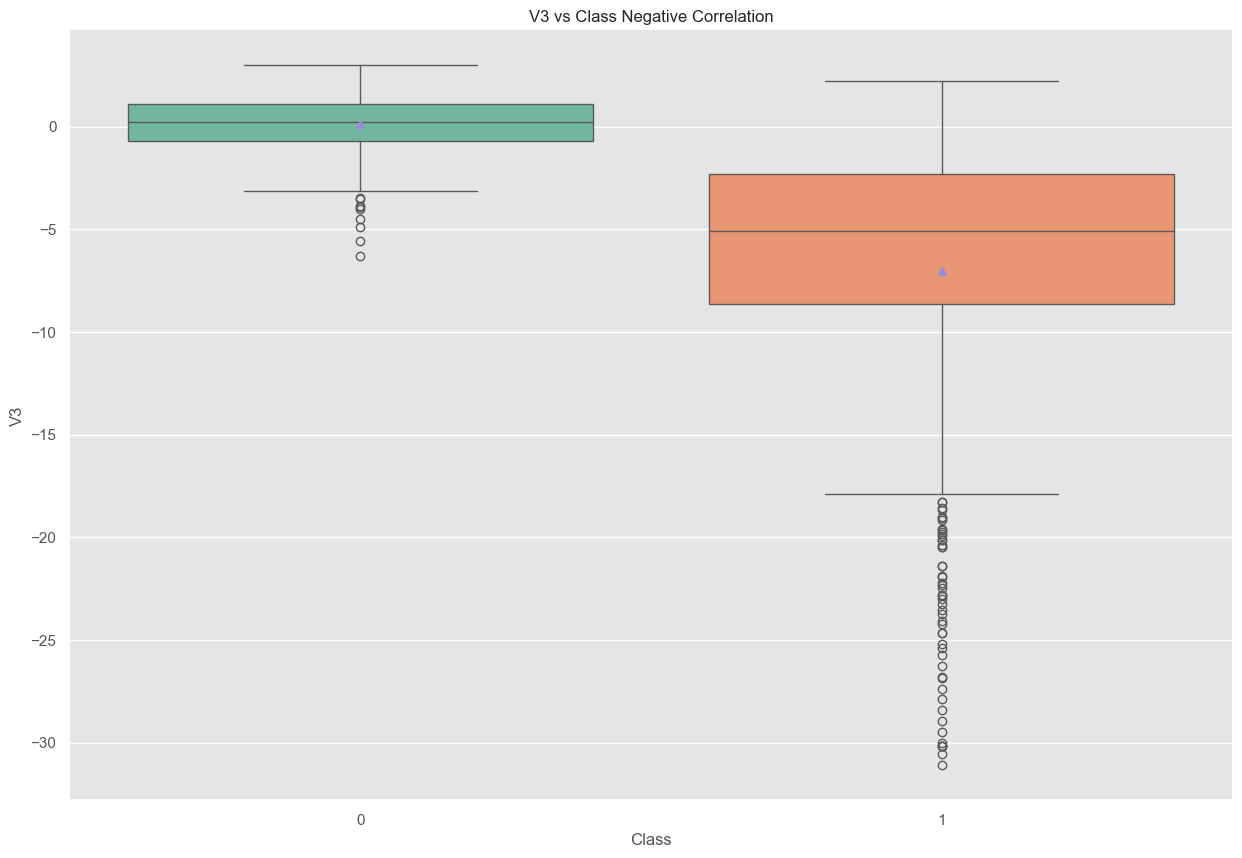

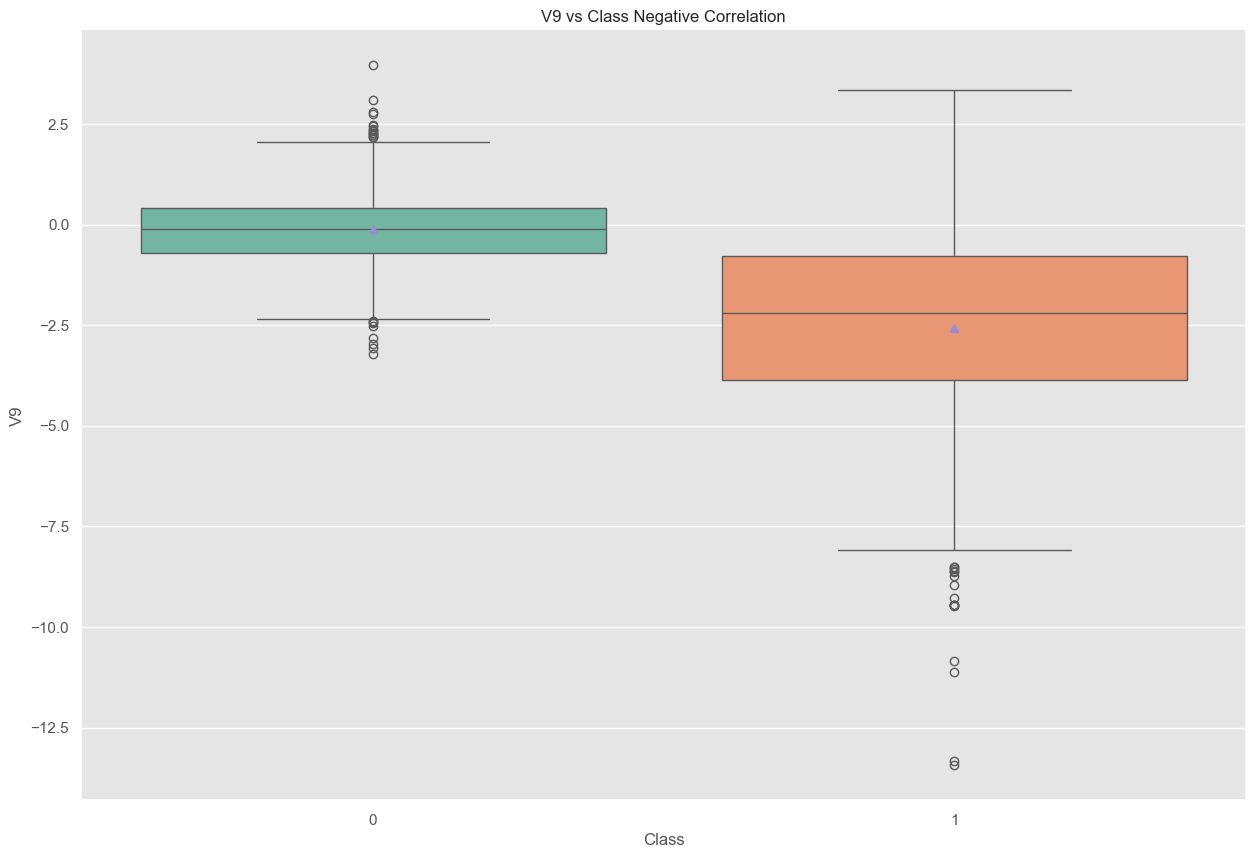

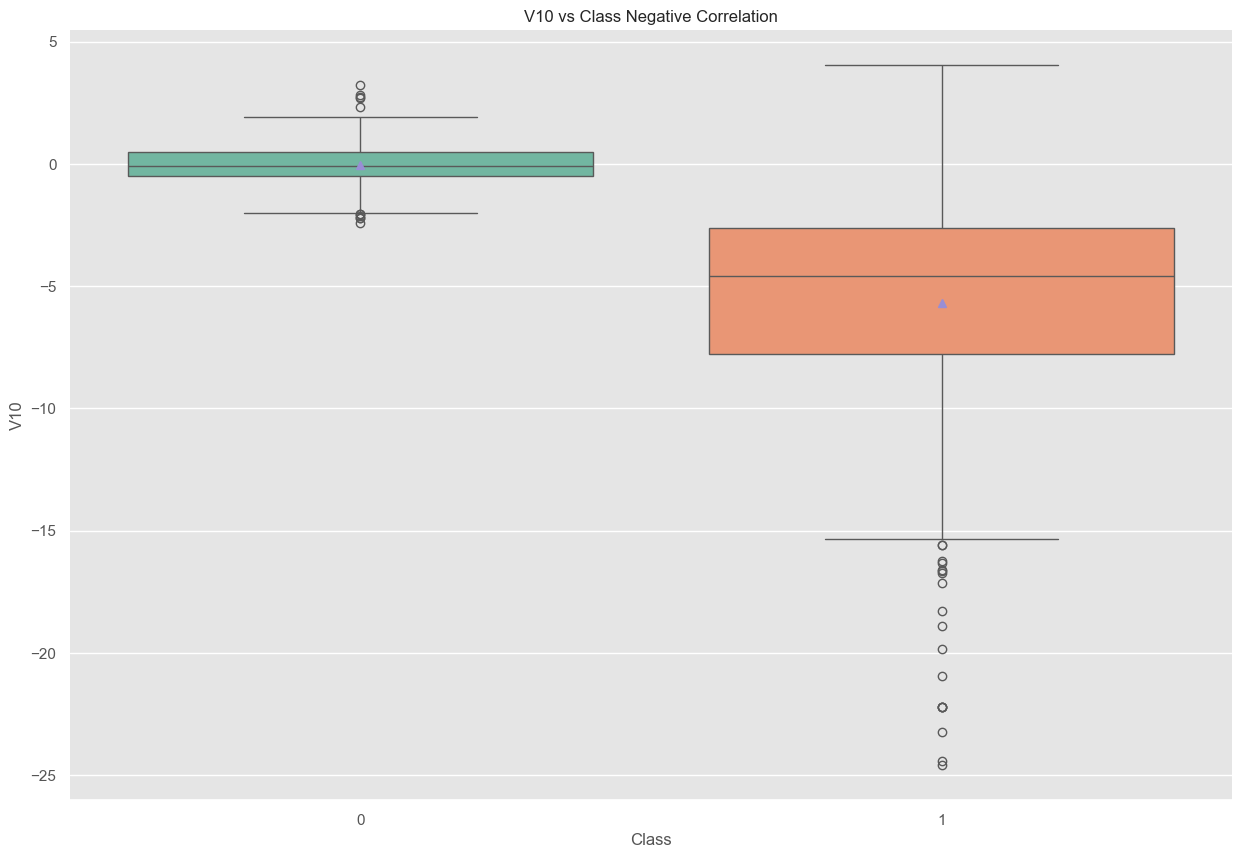

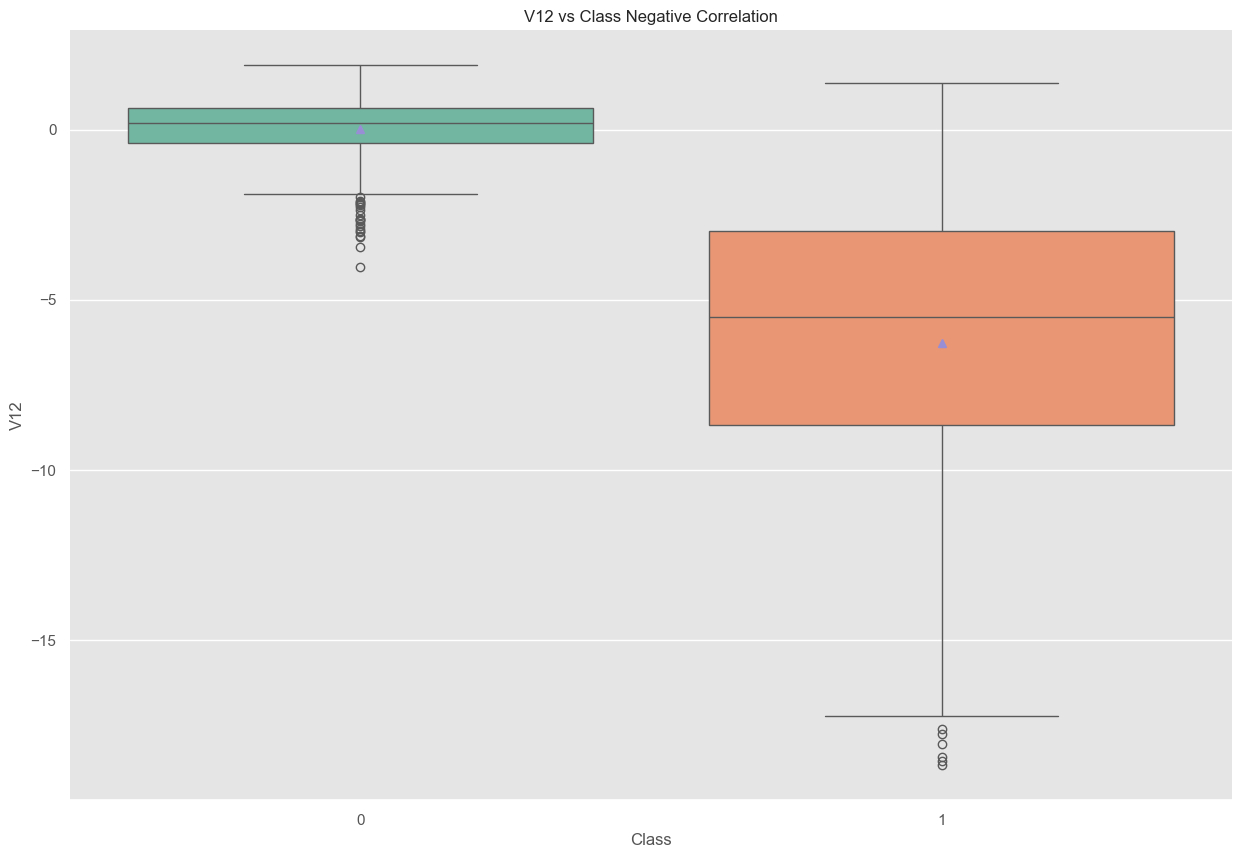

In [34]:
for col in balanced_data[['V3', 'V9', 'V10', 'V12']] : 
    plt.figure(figsize=(15,10))
    
    plt.subplot(1,1,1)
    sns.boxplot(x='Class', y = col, data =balanced_data, showmeans = True,palette = 'Set2')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f"{col} vs Class Negative Correlation")
    sns.despine(left=True)


    plt.show()

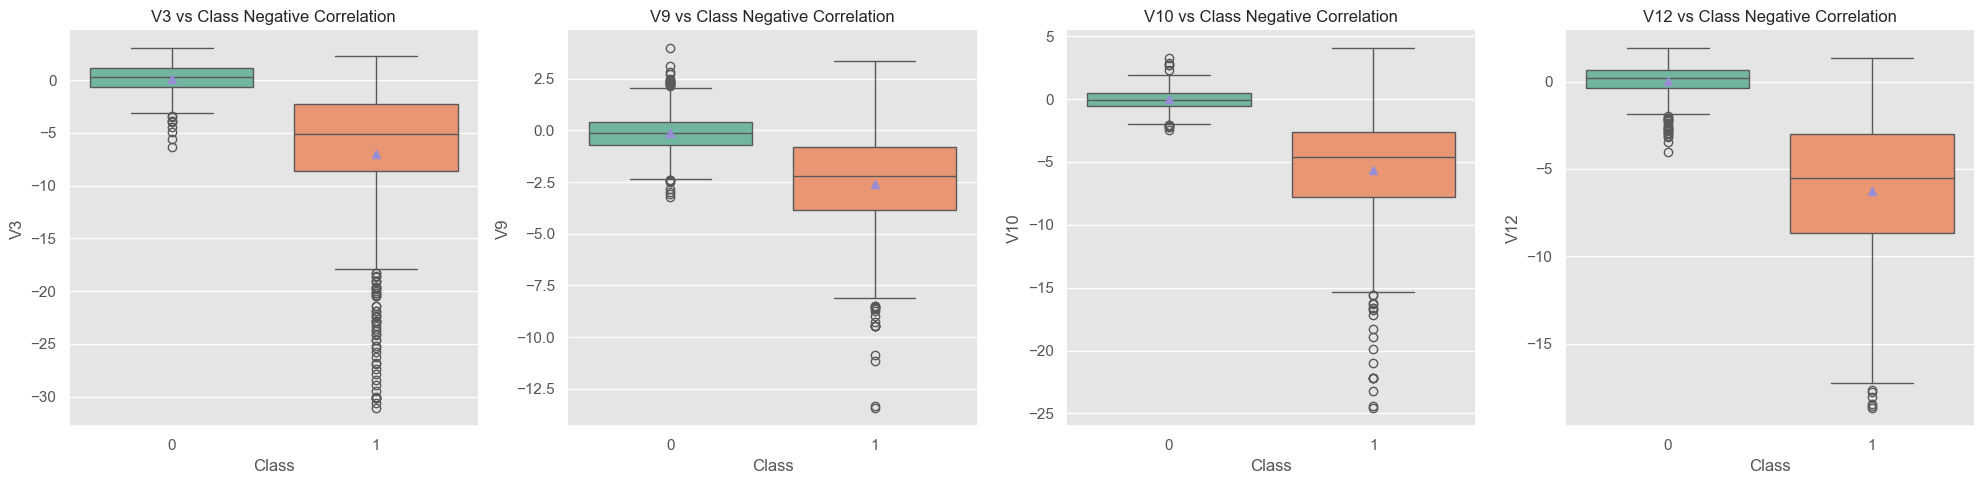

In [35]:

plt.figure(figsize=(20,  5))  

# Loop through columns and create subplots
for i, col in enumerate(balanced_data[['V3', 'V9', 'V10', 'V12']] ):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='Class', y=col, data=balanced_data, showmeans=True, palette='Set2')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f"{col} vs Class Negative Correlation")
    sns.despine(left=True)

# Adjust layout
plt.tight_layout()
plt.show()


it seems those V's when they are netagive values it is Fraud transaction

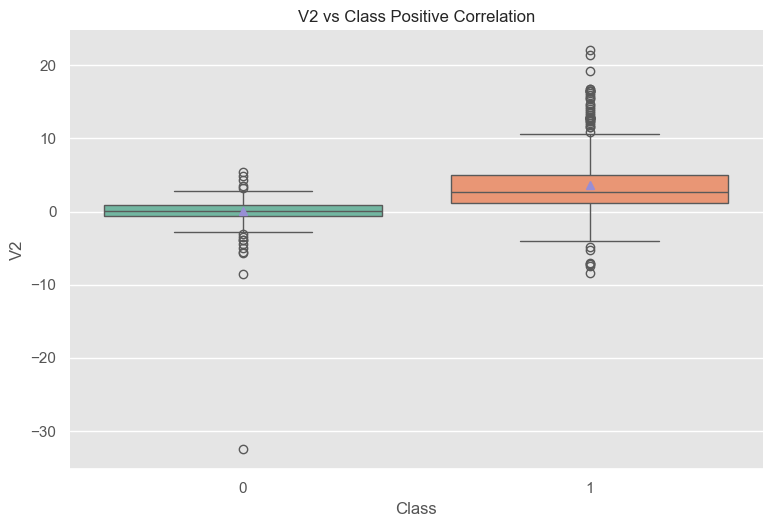

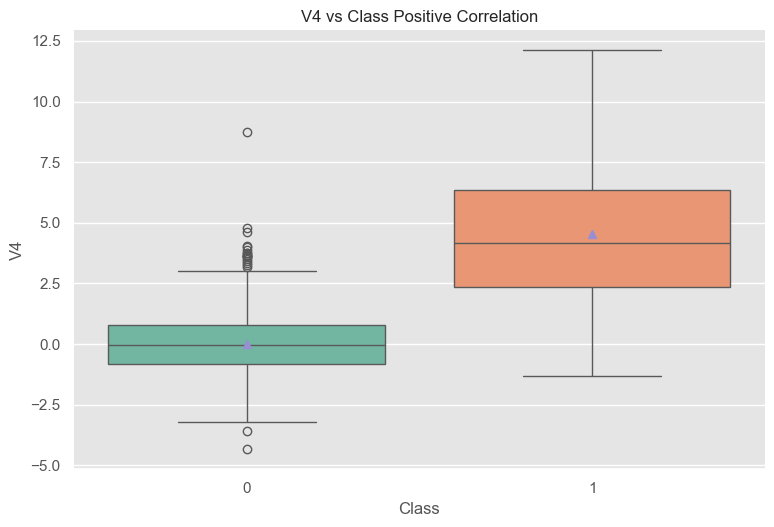

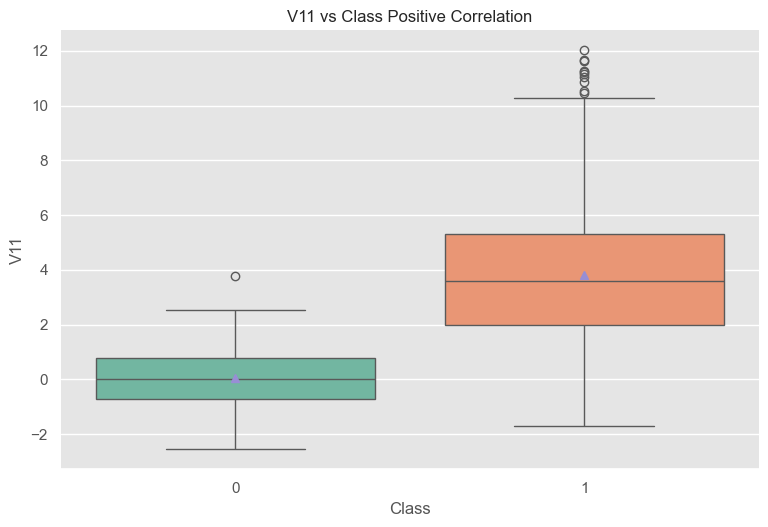

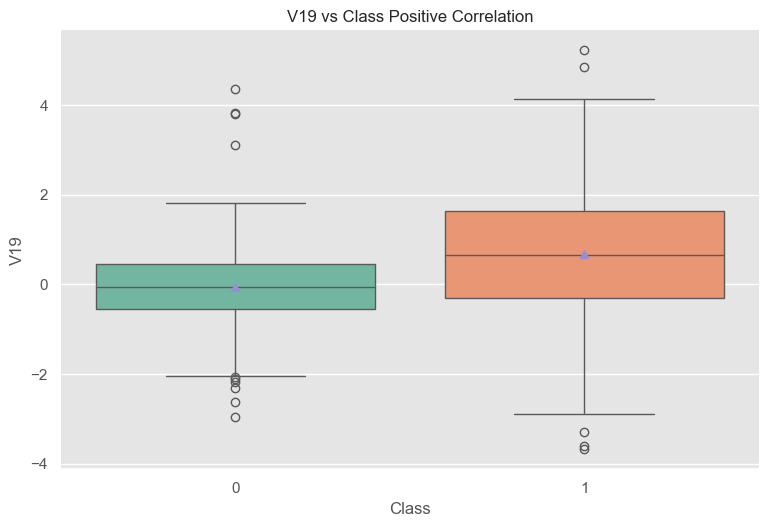

In [37]:
for i, col in enumerate(balanced_data[['V2', 'V4', 'V11', 'V19']] ):
    plt.figure(figsize=(15,10))
    
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Class', y=col, data=balanced_data, showmeans=True, palette='Set2')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f"{col} vs Class Positive Correlation")
    sns.despine(left=True)


    plt.tight_layout()
    plt.show()

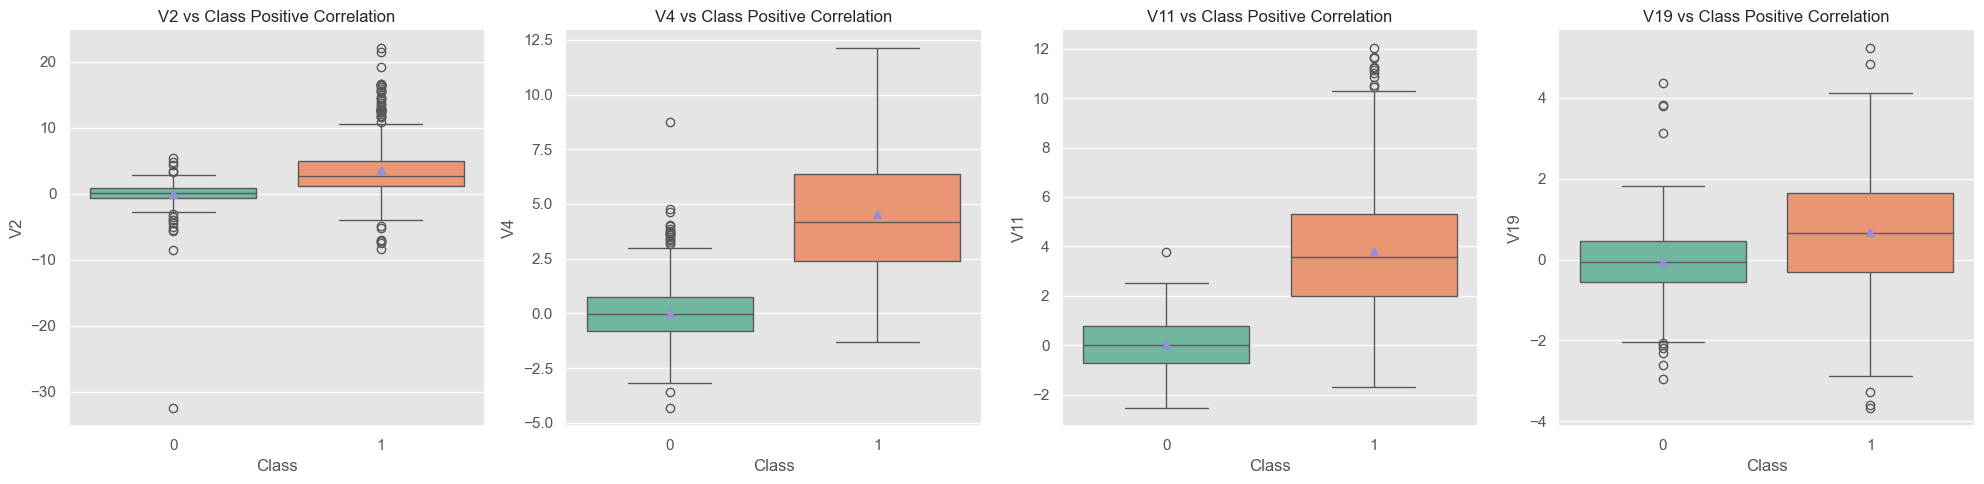

In [38]:

plt.figure(figsize=(20,  5)) 


for i, col in enumerate(balanced_data[['V2', 'V4', 'V11', 'V19']] ):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='Class', y=col, data=balanced_data, showmeans=True, palette='Set2')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f"{col} vs Class Positive Correlation")
    sns.despine(left=True)

# Adjust layout
plt.tight_layout()
plt.show()

it seems those V's when they are highly Postive values it is Fraud transaction

## Feature Scaling

In [41]:
std_scaler = StandardScaler()
balanced_data['scaled_Amount'] = std_scaler.fit_transform(balanced_data['Amount'].values.reshape(-1,1))
balanced_data['scaled_Time'] = std_scaler.fit_transform(balanced_data['Time'].values.reshape(-1,1))

balanced_data = balanced_data.drop(['Amount','Time'], axis=1)

## Feature Engineering

In [43]:

FEATURES = [col for col in balanced_data.columns if col not in ['Class']]
balanced_data["mean"] = balanced_data[FEATURES].mean(axis=1)
balanced_data["std"] = balanced_data[FEATURES].std(axis=1)
balanced_data["min"] = balanced_data[FEATURES].min(axis=1)
balanced_data["max"] = balanced_data[FEATURES].max(axis=1)

balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time,mean,std,min,max
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.461198,-1.819594,-0.528293,1.826068,-4.289254,3.997906
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,2.065948,-1.818212,0.146962,1.380299,-3.157307,2.288644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.684999,-1.734632,-0.739729,1.786915,-6.560124,2.330243
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.179342,-1.681761,-1.804233,3.762778,-12.598419,4.895844
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.456420,-1.670596,0.110553,2.753863,-6.079337,6.739384


## Split the data into Feature and Target variables

In [45]:
X = balanced_data.drop('Class', axis=1)
y = balanced_data.Class

## Split the data into Training and Testing Data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True  ,random_state=42)

In [48]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")

We have 738 Training data
We have 246 Testing data


## Modeling

In [50]:
def kfolds(model, model_name):
    model = cross_val_score(model, X, y, cv=10) 
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {round(model_score * 100,2)}%")
    df_kfolds = pd.DataFrame(data=model,columns=['Accuracy for atch fold'])
    df_kfolds['Accuracy for atch fold'] = df_kfolds['Accuracy for atch fold'].apply('{:.2%}'.format)
    return df_kfolds


def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"""{model_name} model score on Training data: {round(model_train_score * 100,2)}%
{model_name} model score on Testing data: {round(model_test_score * 100,2)}%""")


def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt=".1f", linewidth=.5)

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr , _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(6,6), dpi=100)
    plt.plot(fpr, tpr , color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

## Logistic Regression

In [52]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")


Logistic Regression score on cross validation: 92.58%


,Accuracy for atch fold
0,97.98%
1,82.83%
2,98.99%
3,87.88%
4,88.78%
5,94.90%
6,95.92%
7,93.88%
8,94.90%
9,89.80%


In [53]:
train(lr_model, "Logistic Regression")

Logistic Regression model score on Training data: 95.39%
Logistic Regression model score on Testing data: 94.72%


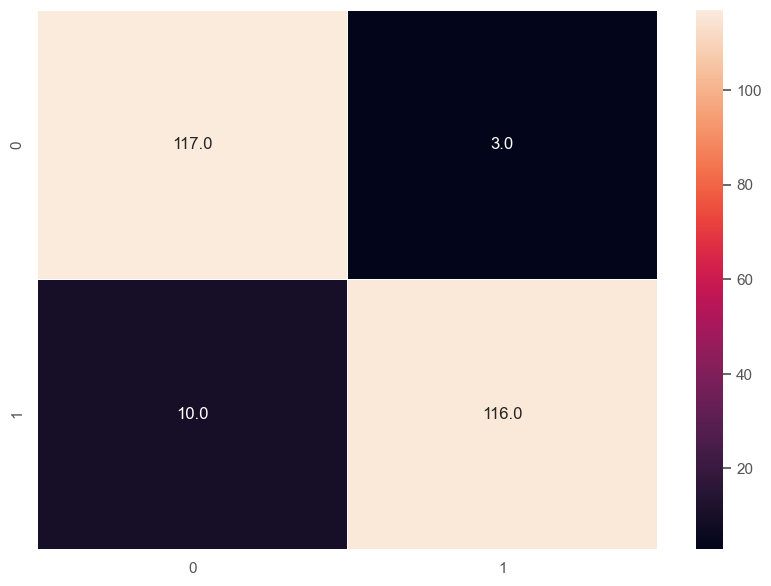

In [54]:
conf_matrix(lr_model)

In [55]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       120
           1       0.97      0.92      0.95       126

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



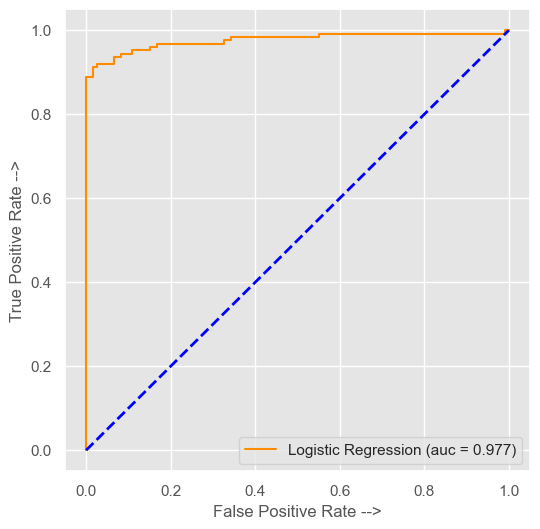

In [56]:
roc(lr_model, "Logistic Regression")

## Random Forest


In [58]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")

Random Forest score on cross validation: 93.59%


,Accuracy for atch fold
0,95.96%
1,97.98%
2,100.00%
3,87.88%
4,88.78%
5,92.86%
6,95.92%
7,92.86%
8,92.86%
9,90.82%


In [59]:
train(rf_model, "Random Forest")


Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 93.9%


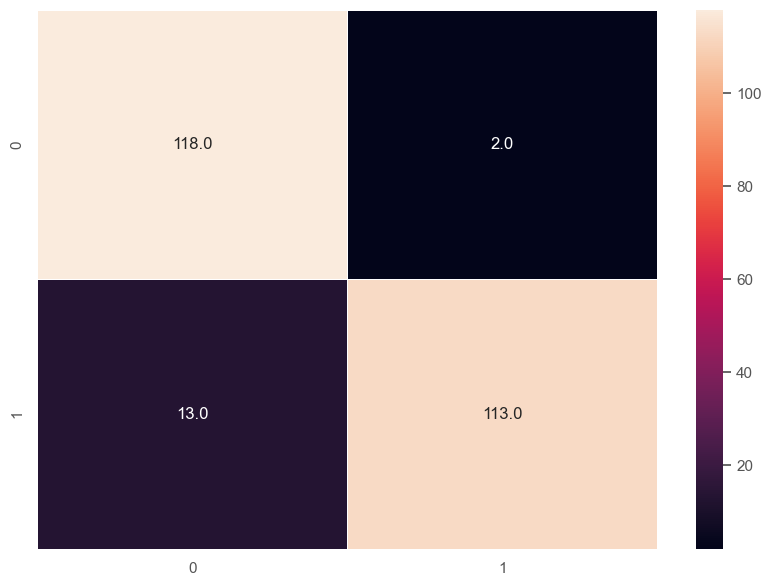

In [60]:

conf_matrix(rf_model)

In [61]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       120
           1       0.98      0.90      0.94       126

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



## KNN

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")

KNN score on cross validation: 93.29%


,Accuracy for atch fold
0,95.96%
1,94.95%
2,100.00%
3,87.88%
4,87.76%
5,94.90%
6,94.90%
7,93.88%
8,91.84%
9,90.82%


In [64]:
train(knn_model, "KNN")


KNN model score on Training data: 95.66%
KNN model score on Testing data: 94.31%


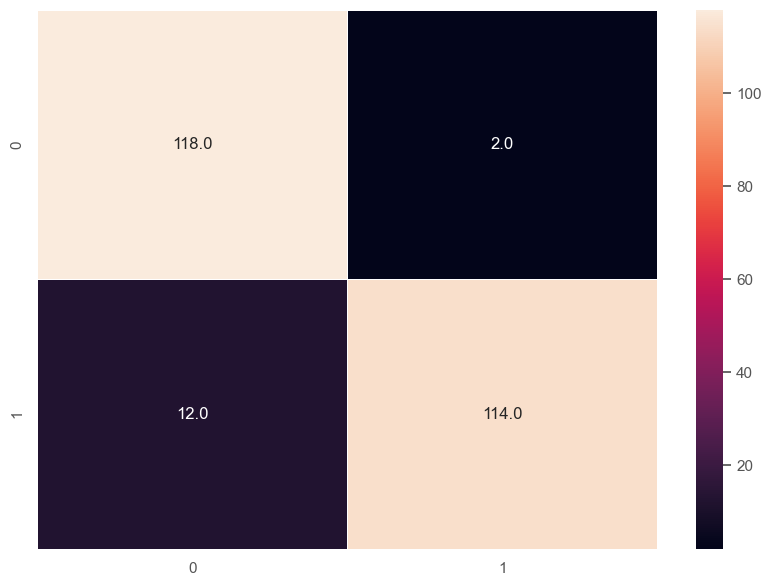

In [65]:
conf_matrix(knn_model)

In [66]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       120
           1       0.98      0.90      0.94       126

    accuracy                           0.94       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246



## Bagging

In [68]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")

Bagging score on cross validation: 92.16%


,Accuracy for atch fold
0,94.95%
1,96.97%
2,100.00%
3,87.88%
4,87.76%
5,91.84%
6,89.80%
7,91.84%
8,89.80%
9,90.82%


In [69]:
train(bagg_model, "Bagging")

Bagging model score on Training data: 99.59%
Bagging model score on Testing data: 91.46%


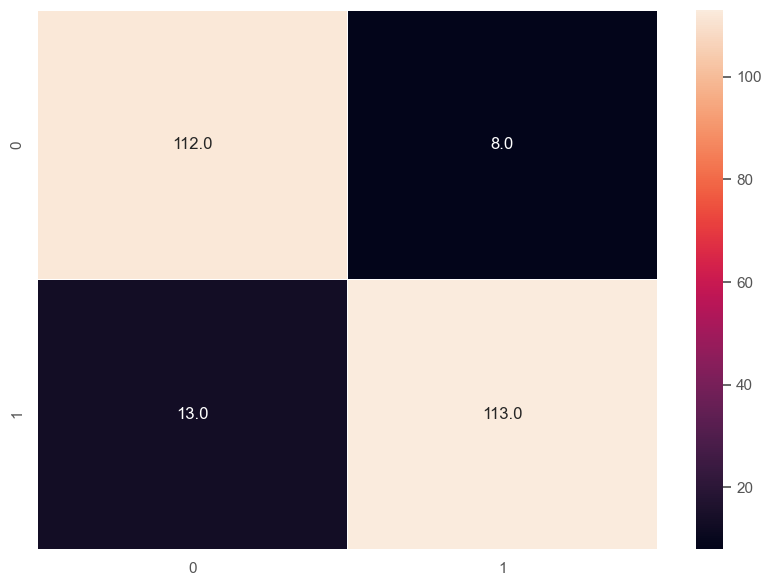

In [70]:
conf_matrix(bagg_model)

In [71]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.93      0.90      0.91       126

    accuracy                           0.91       246
   macro avg       0.91      0.92      0.91       246
weighted avg       0.92      0.91      0.91       246



## Gradient Boosting


In [73]:
gb_model = GradientBoostingClassifier()
kfolds(gb_model, "Boosting")

Boosting score on cross validation: 93.38%


,Accuracy for atch fold
0,97.98%
1,97.98%
2,98.99%
3,87.88%
4,86.73%
5,92.86%
6,93.88%
7,92.86%
8,93.88%
9,90.82%


In [74]:
train(gb_model, "Boosting")

Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 93.09%


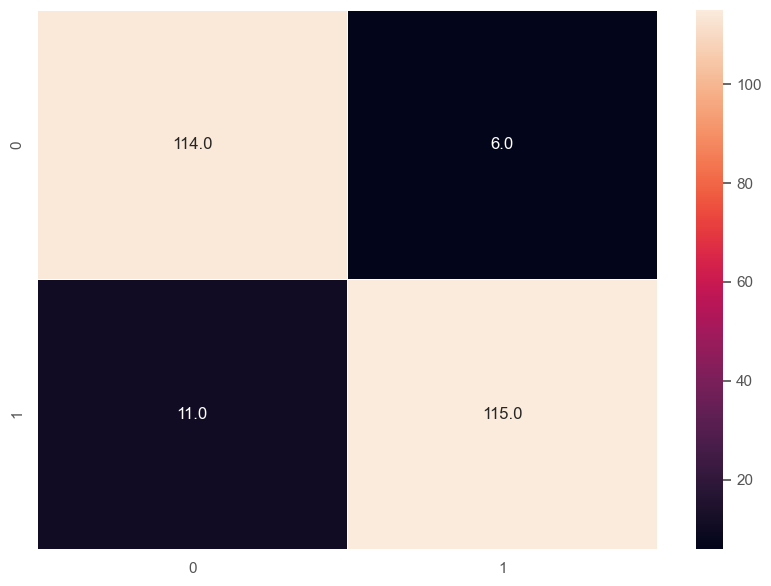

In [75]:
conf_matrix(gb_model)

In [76]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       120
           1       0.95      0.91      0.93       126

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



## Decision Tree


In [78]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")

Decision Tree score on cross validation: 89.32%


,Accuracy for atch fold
0,93.94%
1,93.94%
2,94.95%
3,84.85%
4,86.73%
5,85.71%
6,91.84%
7,89.80%
8,82.65%
9,88.78%


In [79]:
train(dt_model, "Decision Tree")

Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 88.21%


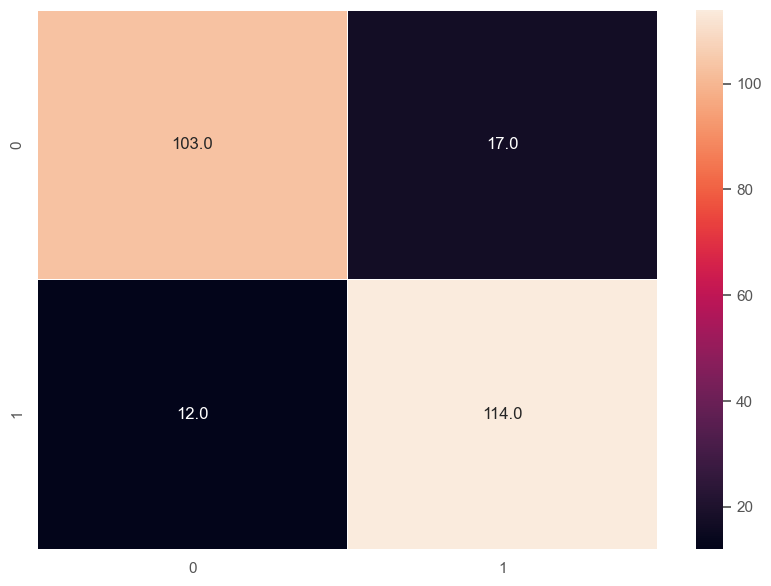

In [80]:
conf_matrix(dt_model)

In [81]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       120
           1       0.87      0.90      0.89       126

    accuracy                           0.88       246
   macro avg       0.88      0.88      0.88       246
weighted avg       0.88      0.88      0.88       246



## SVM

In [83]:
svm_model = SVC(kernel='linear', gamma='auto')
kfolds(svm_model, "SVM")

SVM score on cross validation: 92.69%


,Accuracy for atch fold
0,97.98%
1,80.81%
2,100.00%
3,89.90%
4,88.78%
5,95.92%
6,94.90%
7,94.90%
8,93.88%
9,89.80%


In [84]:
train(svm_model, "SVM")

SVM model score on Training data: 95.8%
SVM model score on Testing data: 93.5%


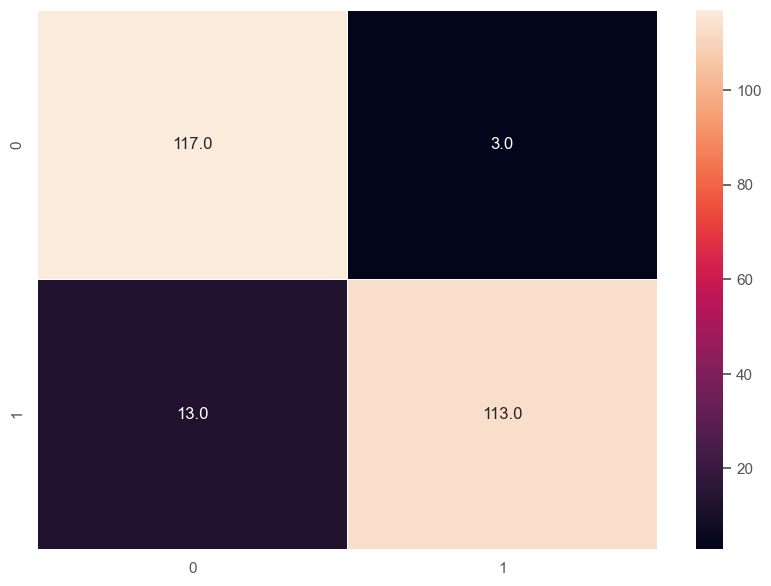

In [85]:
conf_matrix(svm_model)

In [86]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       120
           1       0.97      0.90      0.93       126

    accuracy                           0.93       246
   macro avg       0.94      0.94      0.93       246
weighted avg       0.94      0.93      0.93       246



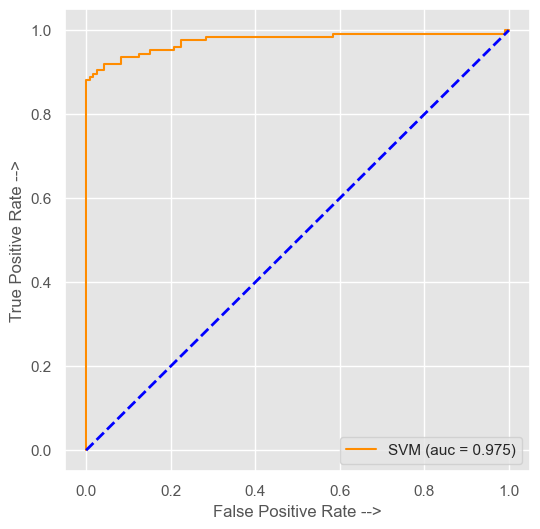

In [87]:
roc(svm_model, "SVM")

## TP, TN, FP, FN


In [89]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"- TP, FN, TP, FP Overall Accuarcy of {model_name}: {round(ACC*100,2)}%\n")
    print(f"- Sensitivity Accuarcy of {model_name}: {round(TPR * 100,2)}%\n")
    print(f"- Specificity Negative Rate Accuarcy of {model_name}: {round(TNR * 100,2)}%\n")
    print(f"- Negative predictive value Accuarcy of {model_name}: {round(NPV * 100,2)}%\n")
    print(f"- Fall out Accuarcy of {model_name}: {round(FPR * 100,2)}%\n")
    print(f"- False negative rate Accuarcy of {model_name}: {round(FNR * 100,2)}%\n")
    print(f"- False discovery rate Accuarcy of {model_name}: {round(FDR * 100,2)}%")

In [90]:
tp(lr_model, "Logistic Regression")

- TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 94.72%

- Sensitivity Accuarcy of Logistic Regression: 92.06%

- Specificity Negative Rate Accuarcy of Logistic Regression: 97.5%

- Negative predictive value Accuarcy of Logistic Regression: 92.13%

- Fall out Accuarcy of Logistic Regression: 2.5%

- False negative rate Accuarcy of Logistic Regression: 7.94%

- False discovery rate Accuarcy of Logistic Regression: 2.52%


In [91]:
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.12.2


In [92]:
from tpot import TPOTClassifier

In [93]:
tpot_model = TPOTClassifier(generations=8, population_size=100, cv=10,
                                    random_state=40, verbosity=2, scoring='accuracy',n_jobs=-1)


In [94]:
train(tpot_model, "Automated Machine Learning")


Optimization Progress:   0%|          | 0/900 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9457423176601258

Generation 2 - Current best internal CV score: 0.9457423176601258

Generation 3 - Current best internal CV score: 0.9457423176601258

Generation 4 - Current best internal CV score: 0.9457423176601258

Generation 5 - Current best internal CV score: 0.9471121806738246

Generation 6 - Current best internal CV score: 0.9471121806738246

Generation 7 - Current best internal CV score: 0.9471121806738246

Generation 8 - Current best internal CV score: 0.9471121806738246

Best pipeline: LinearSVC(input_matrix, C=0.1, dual=True, loss=squared_hinge, penalty=l2, tol=0.001)
Automated Machine Learning model score on Training data: 95.12%
Automated Machine Learning model score on Testing data: 94.72%


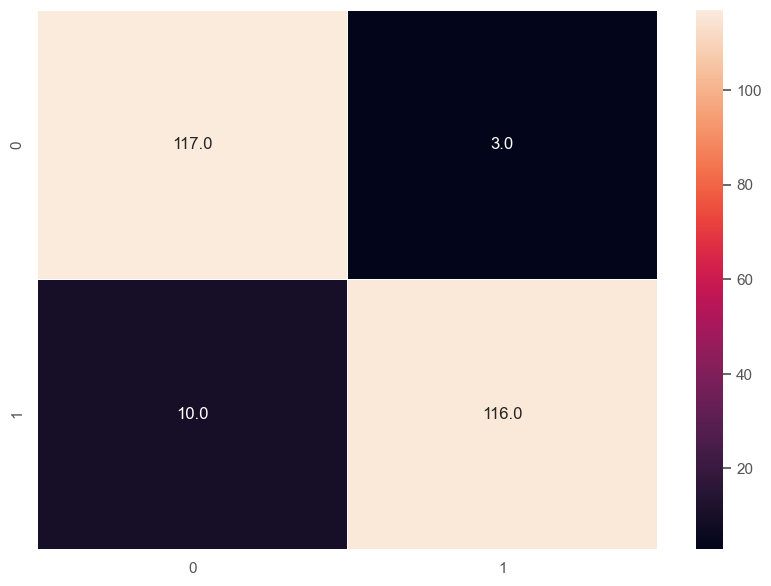

In [168]:
conf_matrix(tpot_model)

In [170]:
class_report(tpot_model)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       120
           1       0.97      0.92      0.95       126

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



In [ ]:
tp(tpot_model, "Automated ML")